In [87]:
#先准备好数据先
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris   #这里sklearn只是用来导入鸟花集，逻辑回归的核心还是根据公式原理手搓的
#设置绘图大小
plt.style.use({'figure.figsize':(25,20)}) # 给画大小, 长25, 宽20

plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [88]:
iris=load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

#转换为 DataFrame
data=pd.DataFrame(data=X, columns=feature_names)
data['species'] = y  # 添加种类列的标签
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
#看看我们的导入的数据集有无缺失，数据类型
data.info()
data                                      #一睹芳容

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [90]:
data.shape

(150, 5)

In [91]:
#因为数据集有三类不同品种的花，所以我们剔除一类，再来进行LR
#那就去除后面的第三类 代号2吧
X=X[y!=2]
y=y[y!=2]

In [92]:
#现在正式开始LR
#添加截距
X=np.hstack((np.ones((X.shape[0],1)), X))

In [93]:
#设置好训练集与测试集
np.random.seed(666)  #就是喜欢666
indices=np.random.permutation(len(X))
train_size=int(len(X)*0.8)   #八比二吧
X_train,y_train=X[indices[:train_size]],y[indices[:train_size]]
X_test,y_test=X[indices[train_size:]],y[indices[train_size:]]


In [94]:
# 设置训练集的均值和标准差，对特征进行标准化
mean=X_train[:, 1:].mean(axis=0)
std=X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [95]:
#LR核心开始

In [96]:
#设置好各项参数
class LogisticRegression:
    def __init__(self,alpha=0.01,interation=5000):
        self.alpha=alpha#学习率
        self.interation=interation#迭代次数
        self.theta=None#模型的权重参数W

        self.losshistory=[]#记录下损失值，画可视化函数
    #sigmoid函数        高中信息题出现过的的函数今天也是被我用上了，哈哈
    #Z=参数与X点乘，作为在sigmoid中的最终变量
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def fit(self,X,y):
        m,n=X.shape        #样本数与加了截距的特征数
        self.theta=np.zeros(n)
        for _ in range(self.interation):
            z=np.dot(X,self.theta)
            #算概率h theta
            h=self.sigmoid(z)
            #算出梯度
            gradient=np.dot(X.T,h-y)/m
            #差点忘了更新权重参数
            self.theta=self.theta-self.alpha*gradient
            #算交叉熵
            loss=(-y*np.log(h)-(1-y)*np.log(1-h)).mean()


            self.losshistory.append(loss)
    #返回概率和分类的最终结果
    def predict_hthetax(self,X):
        return self.sigmoid(np.dot(X,self.theta))
    def predict(self,X,threshold=0.5):
        return (self.predict_hthetax(X) >= threshold).astype(int)

In [97]:
#LR的各个板块我们已经弄好了，接下来就开始模型的训练
model=LogisticRegression(alpha=0.01,interation=5000)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
#来获取一下准确率，英文怎么拼写来着。。。。accuracy rate就叫ar吧
ar=np.mean(y_pred==y_test)
y_proba = model.predict_hthetax(X_test)
print('准确率Accuracy rate:',ar*100,'%')

print("\n\n权重参数",model.theta)
print("\n\n最后一次迭代的损失值",model.losshistory[-1])


#输出分类结果和错误分析
print("\n测试集分类结果和对应的预测概率")
for i in range(len(y_test)):
    print(f"样本 {i}:预测={y_pred[i]},真实={y_test[i]},预测为1的概率={y_proba[i]:.4f}")

errors=np.where(y_pred != y_test)[0]
print(f"\n错误样本{len(errors)}个")
for i in errors:
    print(f"样本索引 {i}:预测={y_pred[i]},真实={y_test[i]},预测为1的概率={y_proba[i]:.4f}")

准确率Accuracy rate: 100.0 %


权重参数 [ 0.02919686  1.03634786 -1.34762335  1.77611714  1.79136752]


最后一次迭代的损失值 0.0113186662145592

测试集分类结果和对应的预测概率
样本 0:预测=1,真实=1,预测为1的概率=0.9689
样本 1:预测=1,真实=1,预测为1的概率=0.9994
样本 2:预测=1,真实=1,预测为1的概率=0.9876
样本 3:预测=0,真实=0,预测为1的概率=0.0078
样本 4:预测=0,真实=0,预测为1的概率=0.0028
样本 5:预测=0,真实=0,预测为1的概率=0.0044
样本 6:预测=1,真实=1,预测为1的概率=0.9975
样本 7:预测=0,真实=0,预测为1的概率=0.0029
样本 8:预测=0,真实=0,预测为1的概率=0.0081
样本 9:预测=1,真实=1,预测为1的概率=0.9829
样本 10:预测=1,真实=1,预测为1的概率=0.9965
样本 11:预测=1,真实=1,预测为1的概率=0.9937
样本 12:预测=0,真实=0,预测为1的概率=0.0086
样本 13:预测=1,真实=1,预测为1的概率=0.9951
样本 14:预测=1,真实=1,预测为1的概率=0.9964
样本 15:预测=1,真实=1,预测为1的概率=0.9979
样本 16:预测=1,真实=1,预测为1的概率=0.9966
样本 17:预测=0,真实=0,预测为1的概率=0.0129
样本 18:预测=0,真实=0,预测为1的概率=0.0184
样本 19:预测=0,真实=0,预测为1的概率=0.0057

错误样本0个


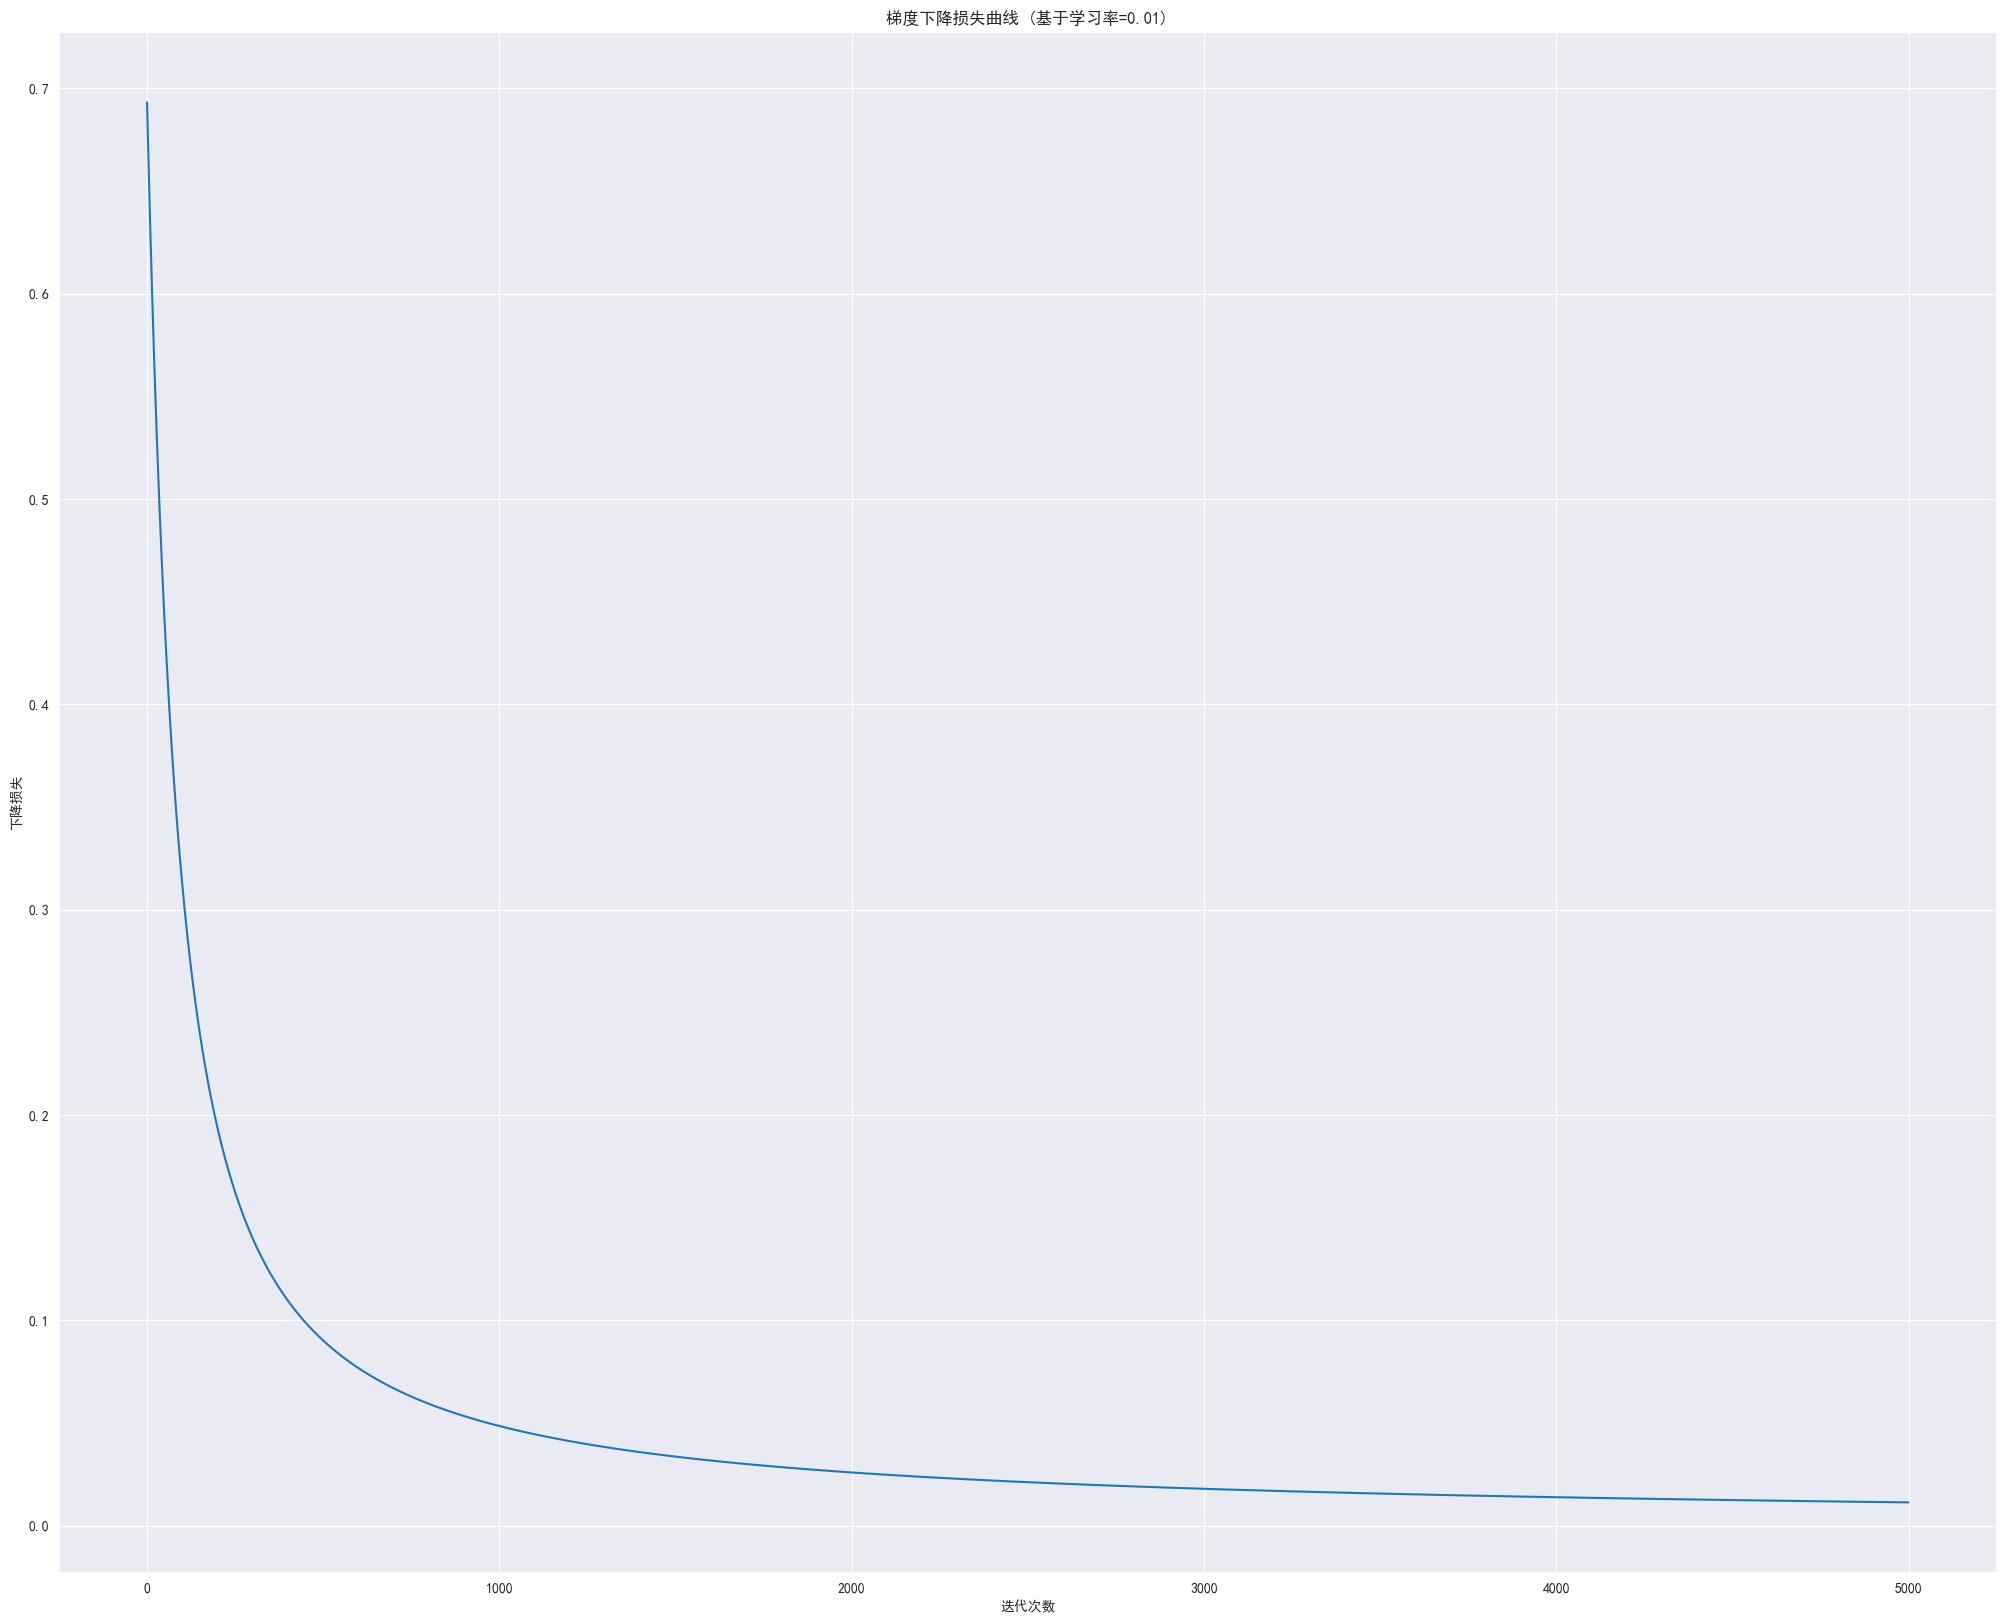

In [98]:
#可视化损失函数
plt.plot(model.losshistory)
plt.xlabel('迭代次数')
plt.ylabel('下降损失')
plt.title('梯度下降损失曲线 (基于学习率=0.01)')
plt.grid(True)
plt.show()